In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

pot1 = pd.read_csv("data/potholes_1.csv")
pot2 = pd.read_csv("data/potholes_2.csv")
potholes = pd.concat([pot1, pot2])

potholes["CREATION DATE"] = pd.to_datetime(potholes["CREATION DATE"], format="%m/%d/%Y")
potholes["Month Created"] = pd.DatetimeIndex(potholes["CREATION DATE"]).month

In [3]:
month_counts = potholes.groupby("Month Created").size()

In [4]:
data = {
    "Month Created": [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
        "10",
        "11",
        "12",
    ]
}

In [5]:
counts = pd.DataFrame(data)

In [6]:
counts.loc[:, "Month Counts"] = month_counts

In [7]:
counts = counts.drop(0)

In [8]:
print(counts)

   Month Created  Month Counts
1              1       55631.0
2              2       71076.0
3              3       96049.0
4              4       75184.0
5              5       58606.0
6              6       50295.0
7              7       38237.0
8              8       29832.0
9              9       23633.0
10            10       23228.0
11            11       16891.0
12            12       21816.0


Text(0.5, 0, 'Month Created')

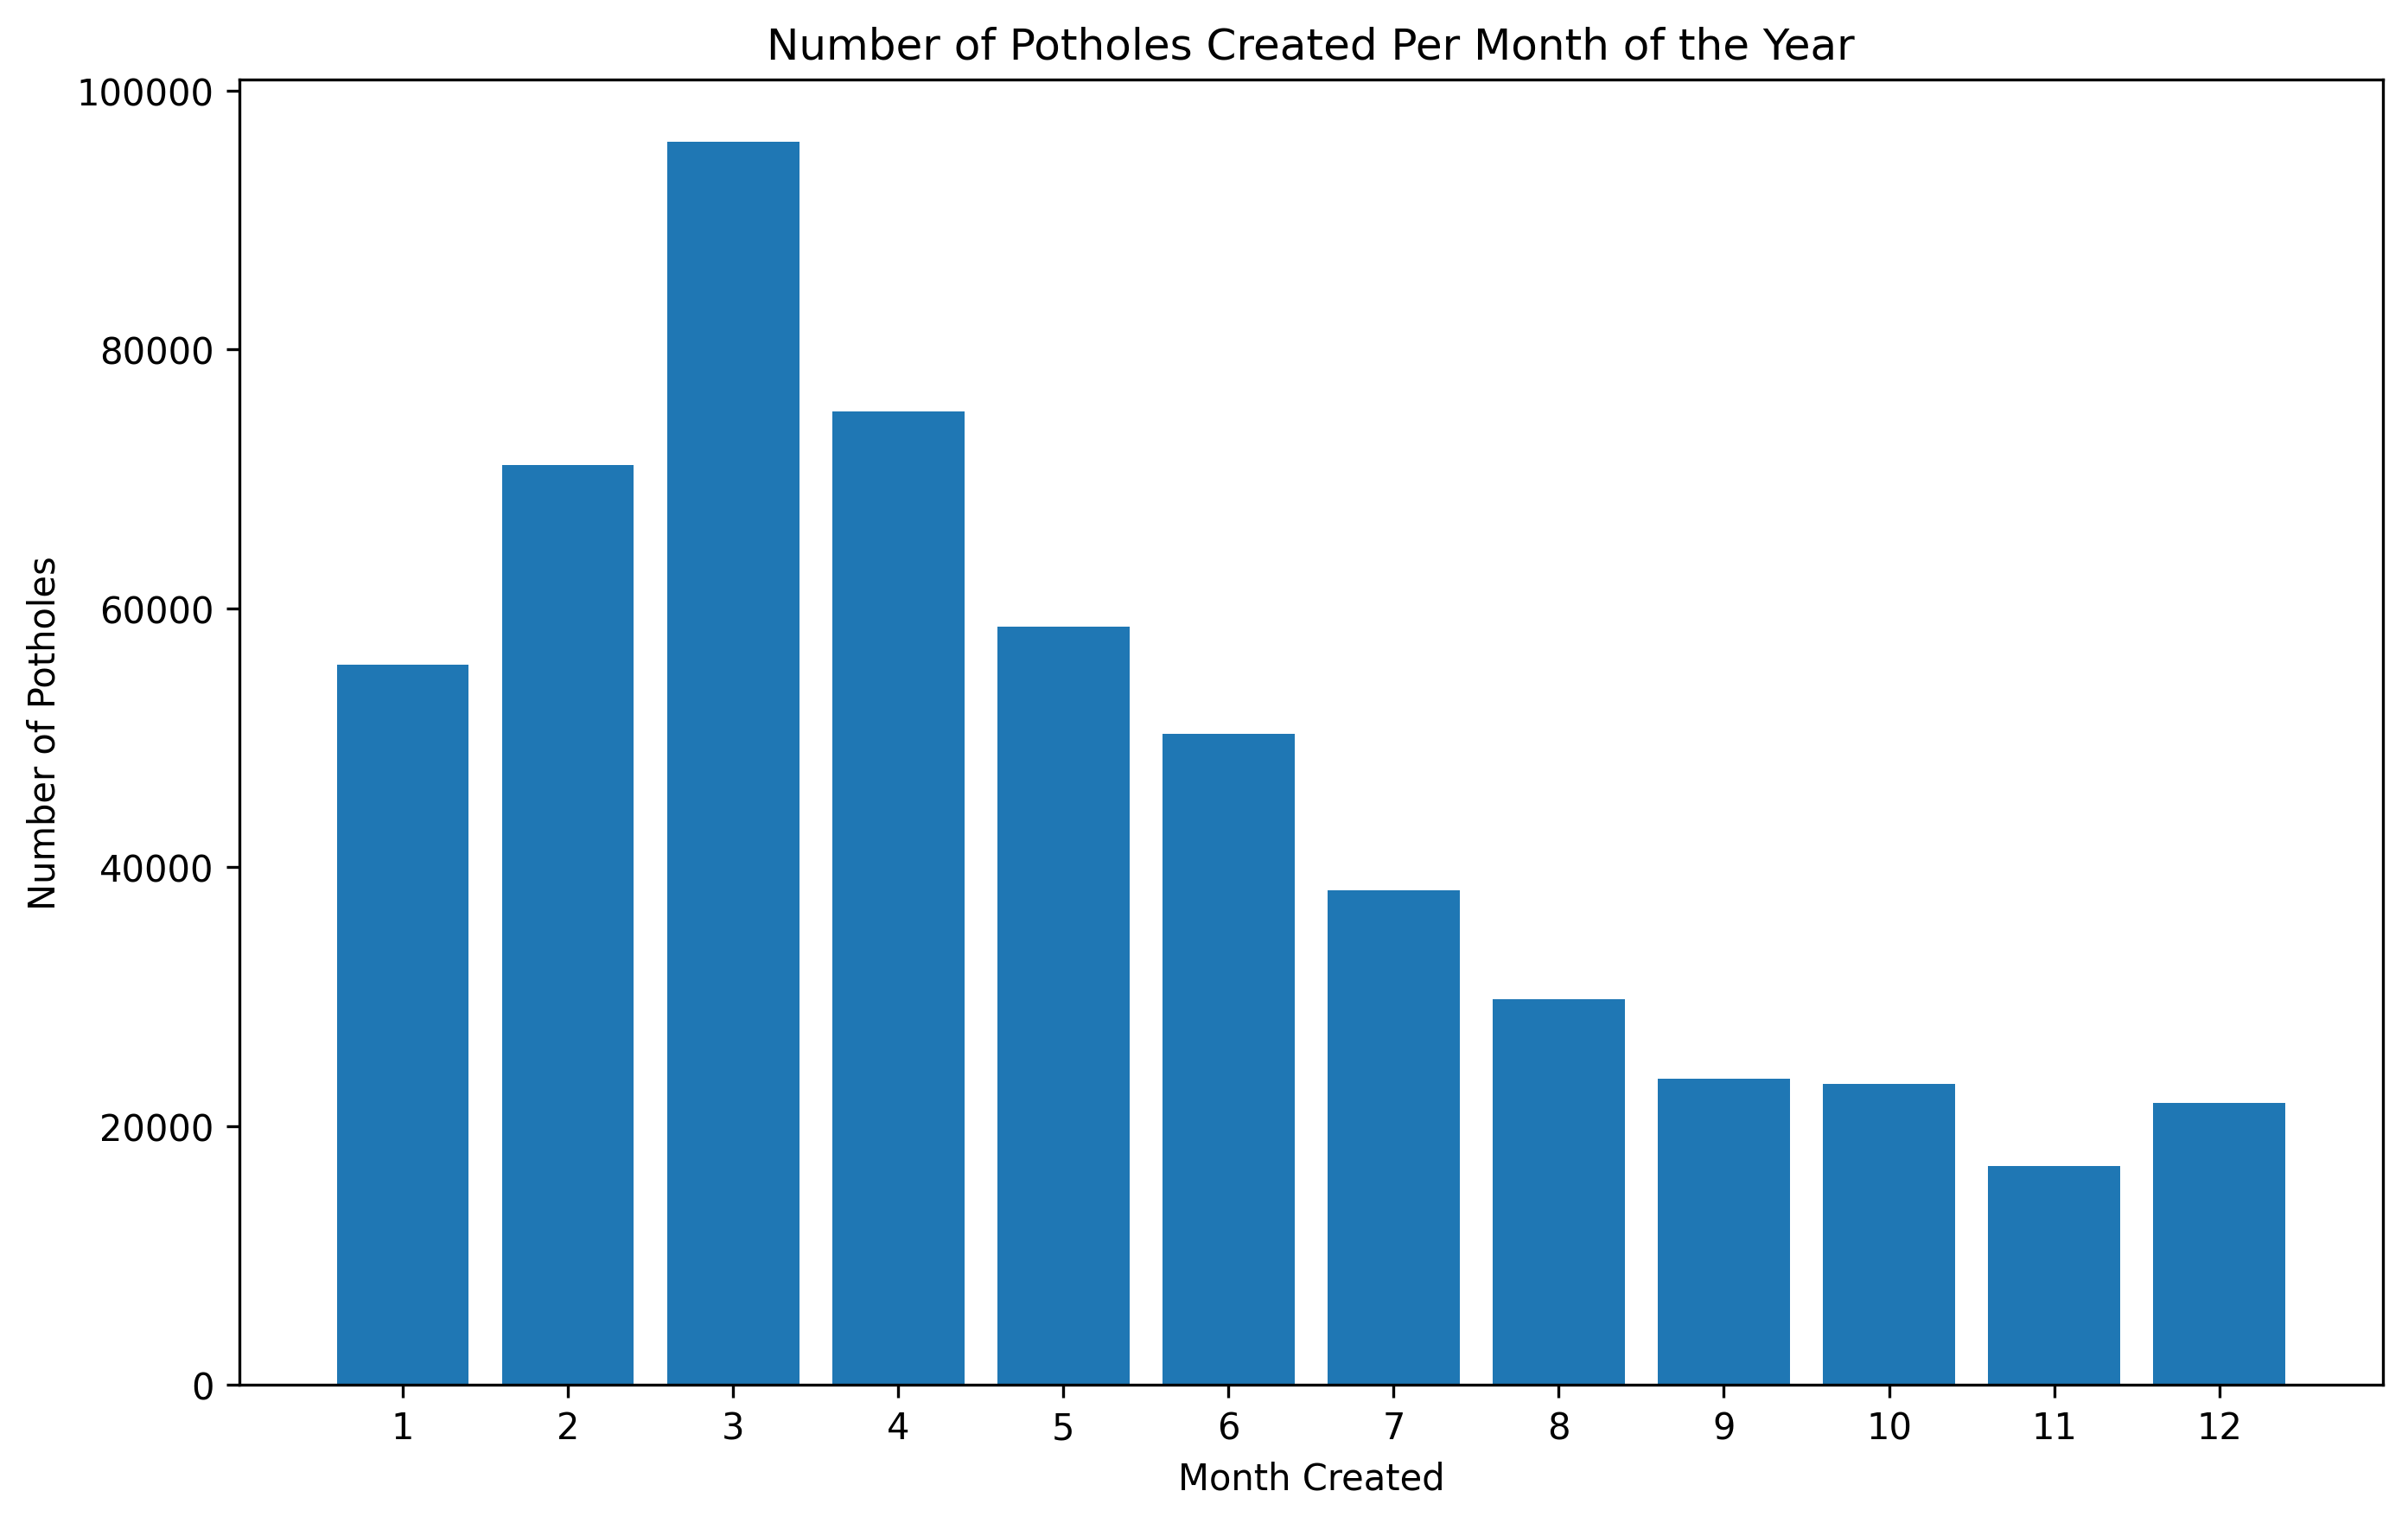

In [9]:
fig = plt.figure(figsize=(16 / 1.5, 10 / 1.5), dpi=300)

ax = fig.add_subplot(111)

monthly_potholes_plot = plt.bar(counts["Month Created"], counts["Month Counts"])

ax.set_title("Number of Potholes Created Per Month of the Year")
ax.set_ylabel("Number of Potholes")
ax.set_xlabel("Month Created")

In [10]:
fig_counts_by_month = fig.get_figure()
fig_counts_by_month.savefig("artifacts/counts_by_month.png")

In [11]:
month_communityarea = potholes.groupby(["Community Area", "Month Created"]).size()

In [12]:
month_by_community = pd.DataFrame(month_communityarea)

month_by_community = month_by_community.reset_index()

month_by_community.columns.values[2] = "Potholes"

month_by_community = month_by_community.sort_values(
    ["Community Area", "Potholes"], ascending=(True, False)
)

month_by_community = month_by_community.reset_index()

del month_by_community["index"]

In [13]:
top_months = month_by_community.iloc[::12, :]

top_months["Community Area"] = top_months["Community Area"].astype(int)

top_months = top_months.set_index("Community Area")

top_months = top_months.sort_values("Potholes", ascending=False)

/var/folders/9n/bhx_ndf93zl1x3nwtpj0zp7m0000gn/T/ipykernel_99781/3829512819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_months["Community Area"] = top_months["Community Area"].astype(int)


In [14]:
top_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 25 to 36
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Month Created  78 non-null     int64
 1   Potholes       78 non-null     int64
dtypes: int64(2)
memory usage: 1.8 KB


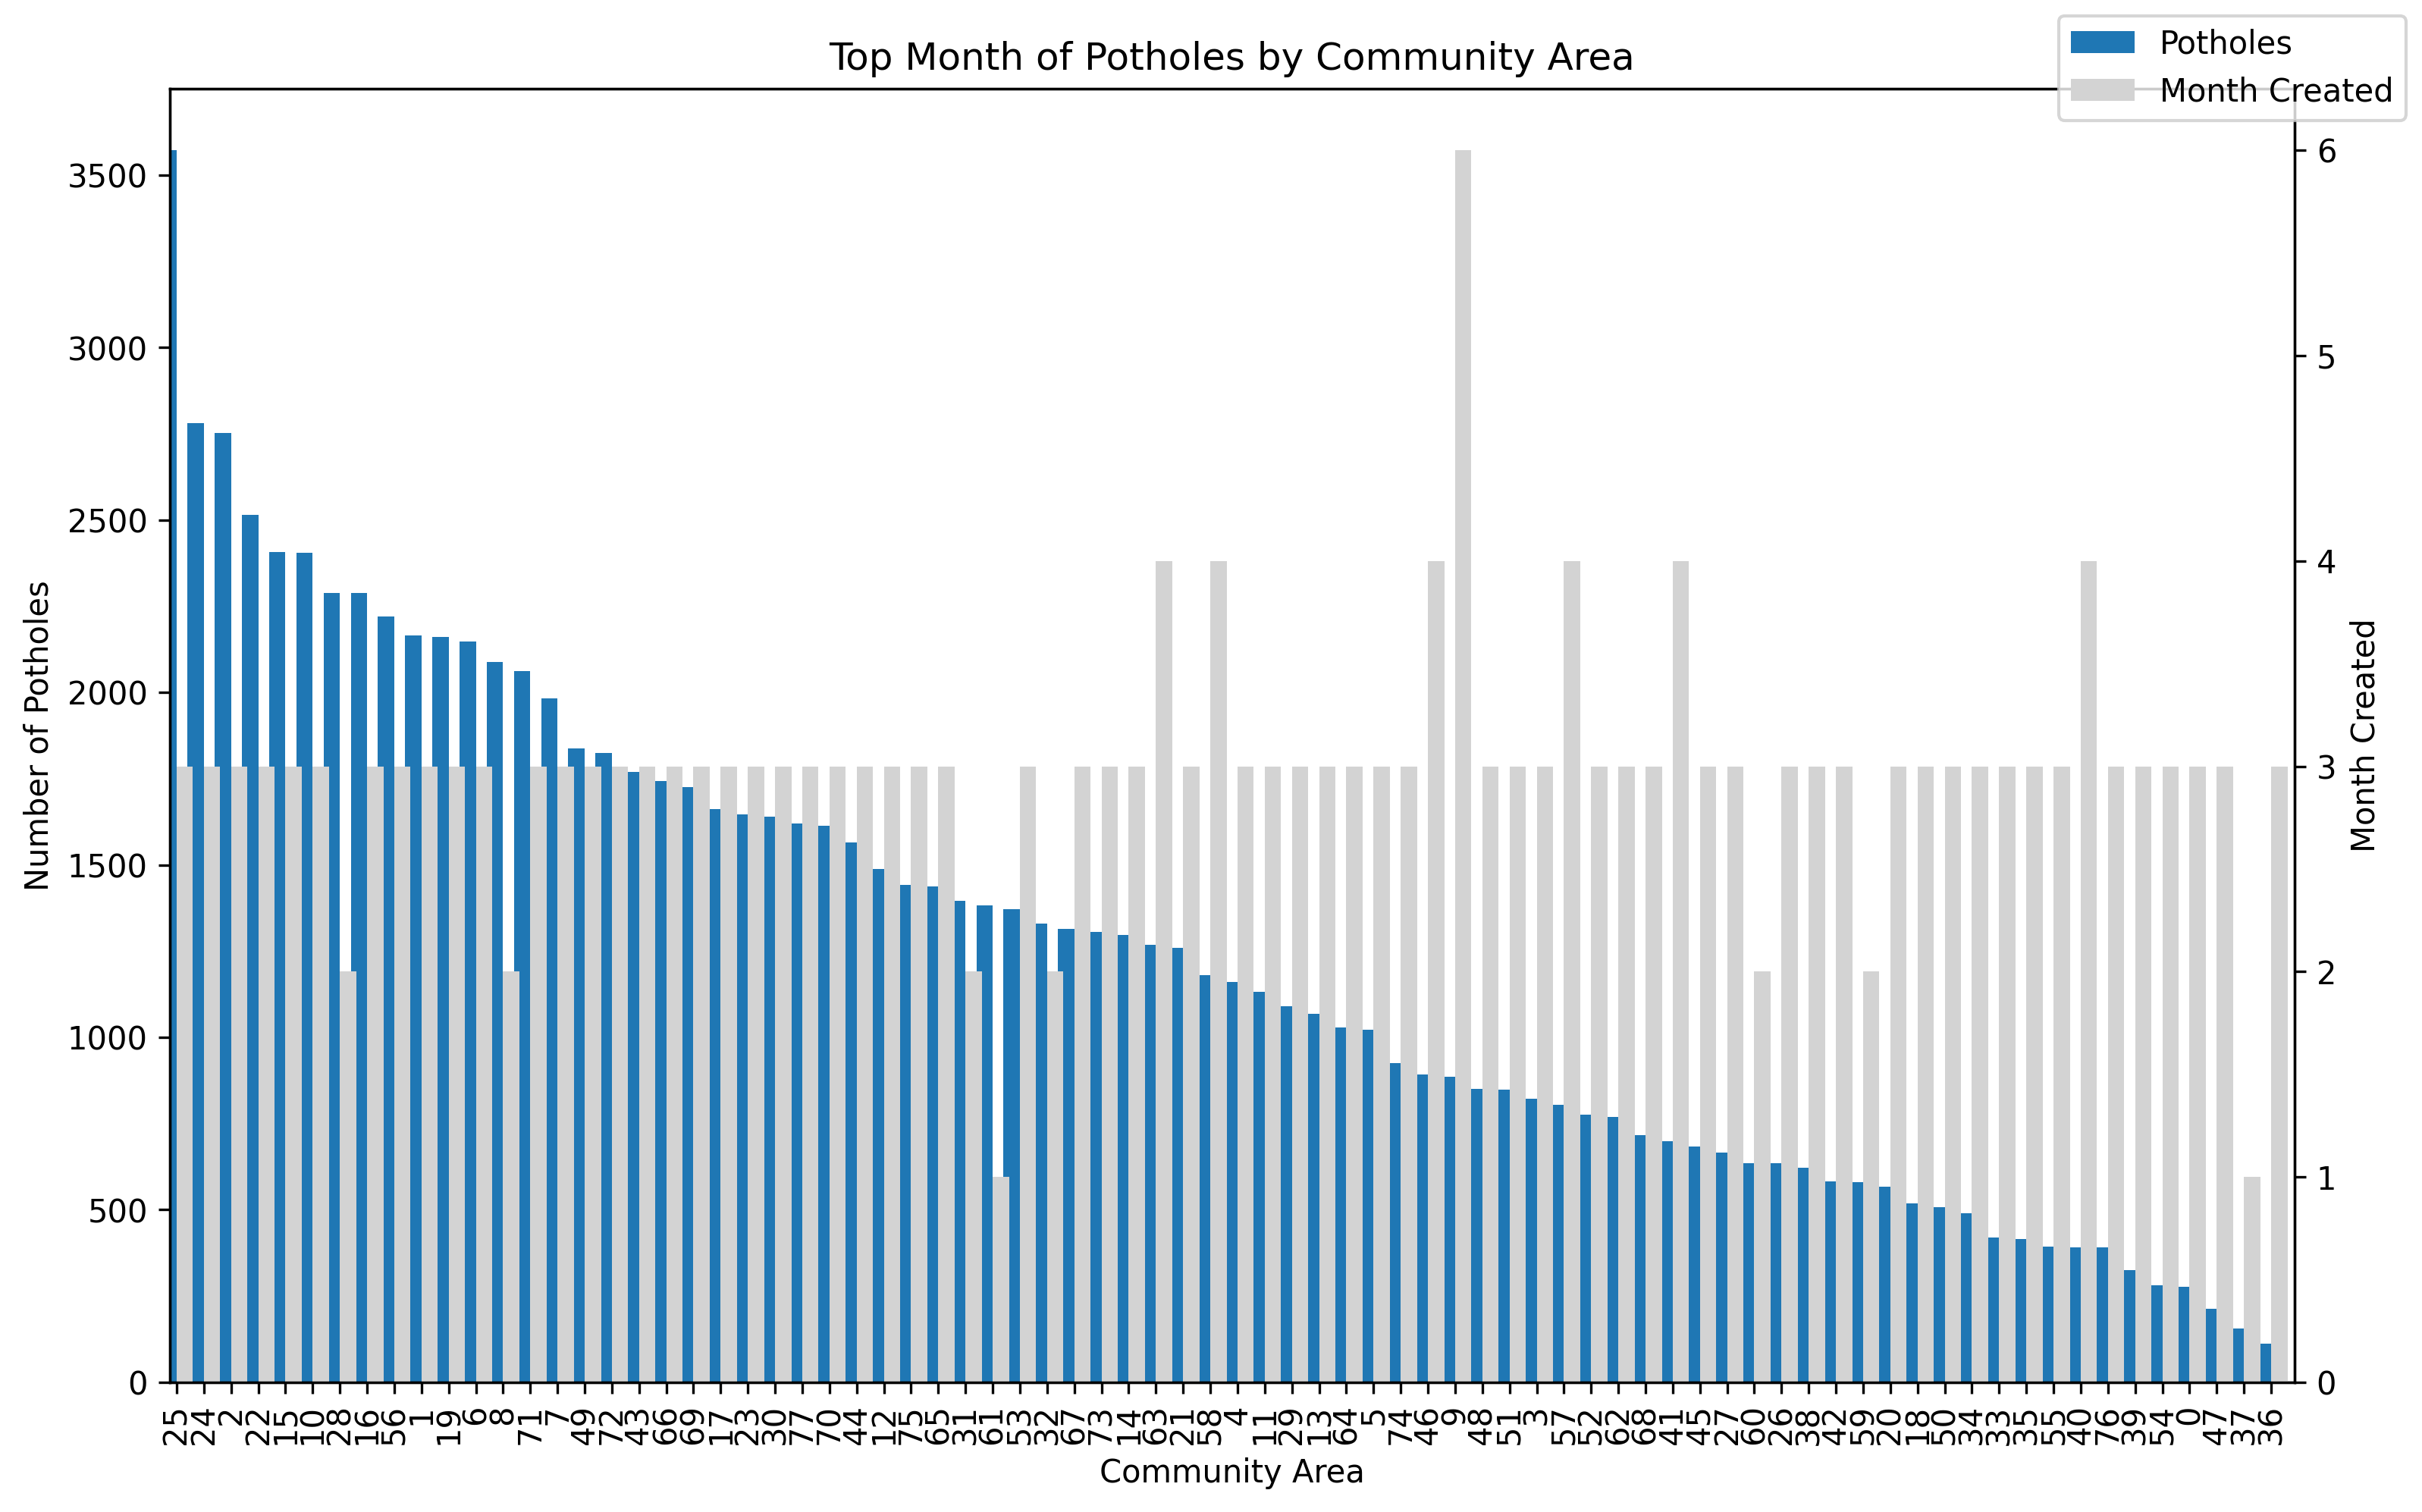

In [15]:
fig2 = plt.figure(figsize=(16 / 1.5, 10 / 1.5), dpi=300)

ax2 = fig2.add_subplot(111)
ax3 = ax2.twinx()

width = 0.6

plot = top_months[("Potholes")].plot(
    kind="bar", ax=ax2, width=width, position=1, label="Potholes"
)
plot2 = top_months[("Month Created")].plot(
    kind="bar",
    color="lightgray",
    ax=ax3,
    width=width,
    position=0,
    label="Month Created",
)

ax2.set_title("Top Month of Potholes by Community Area")
ax2.set_ylabel("Number of Potholes")
ax3.set_ylabel("Month Created")
ax2.set_xlabel("Community Area")

fig2.legend()

fig2.tight_layout()

plt.xticks(fontsize=8)

plt.show()

In [16]:
fig_top_months = plot.get_figure()
fig_top_months.savefig("artifacts/top_months.png")